In [1]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import acquire_PJ
import wrangle_PJ
import acquire

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zillow = acquire.get_zillow_data()

In [3]:
# Get a peak of the dataframe
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77574 entries, 0 to 77573
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77574 non-null  int64  
 1   parcelid                      77574 non-null  int64  
 2   airconditioningtypeid         25006 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77574 non-null  float64
 6   bedroomcnt                    77574 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49808 non-null  float64
 9   calculatedbathnbr             76959 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6035 non-null   float64
 12  calculatedfinishedsquarefeet  77374 non-null  float64
 13  f

In [4]:
# Create a function that will remove rows and columns that have missing values past a certain threshold.
def handle_missing_values(df, p_row = 0.84, p_col = 0.84):
    ''' function which takes in a dataframe, required notnull proportions of non-null rows and columns.
    drop the columns and rows columns based on theshold:'''
    
    #drop columns with nulls
    threshold = int(p_col * len(df.index)) # Require that many non-NA values.
    df.dropna(axis = 1, thresh = threshold, inplace = True)
    
    #drop rows with nulls
    threshold = int(p_row * len(df.columns)) # Require that many non-NA values.
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    
    
    return df

In [5]:
b = handle_missing_values(zillow)

In [6]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77474 entries, 0 to 77573
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77474 non-null  int64  
 1   parcelid                      77474 non-null  int64  
 2   bathroomcnt                   77474 non-null  float64
 3   bedroomcnt                    77474 non-null  float64
 4   calculatedbathnbr             76959 non-null  float64
 5   calculatedfinishedsquarefeet  77373 non-null  float64
 6   finishedsquarefeet12          73919 non-null  float64
 7   fips                          77474 non-null  float64
 8   fullbathcnt                   76959 non-null  float64
 9   latitude                      77474 non-null  float64
 10  longitude                     77474 non-null  float64
 11  lotsizesquarefeet             69300 non-null  float64
 12  propertycountylandusecode     77474 non-null  object 
 13  p

In [7]:
# Take a look at the amount of missing values.
b.isnull().sum()

id                                 0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                515
calculatedfinishedsquarefeet     101
finishedsquarefeet12            3555
fips                               0
fullbathcnt                      515
latitude                           0
longitude                          0
lotsizesquarefeet               8174
propertycountylandusecode          0
propertylandusetypeid              0
rawcensustractandblock             0
regionidcity                    1460
regionidcounty                     0
regionidzip                       45
roomcnt                            0
yearbuilt                        169
structuretaxvaluedollarcnt        99
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
censustractandblock              226
logerror                           0
t

In [8]:
# Create a list of columns to drop.
columns_to_drop = ['calculatedbathnbr','calculatedfinishedsquarefeet','finishedsquarefeet12','fullbathcnt','propertycountylandusecode','propertylandusetypeid','rawcensustractandblock','regionidcity','regionidcounty','regionidzip','structuretaxvaluedollarcnt','censustractandblock','propertylandusedesc']

In [9]:
def drop_columns(df, drop_col):
    df = df.drop(columns=drop_col)
    return df

In [10]:
b = drop_columns(b, columns_to_drop)

In [11]:
b.isna().sum()

id                          0
parcelid                    0
bathroomcnt                 0
bedroomcnt                  0
fips                        0
latitude                    0
longitude                   0
lotsizesquarefeet        8174
roomcnt                     0
yearbuilt                 169
taxvaluedollarcnt           1
assessmentyear              0
landtaxvaluedollarcnt       1
taxamount                   5
logerror                    0
transactiondate             0
dtype: int64

In [12]:
for col in b.columns:
    if b[col].isna().sum() > 0:
        b[col] = b[col].fillna(value = b[col].mean())
        print(b[col])

0          4506.0
1         12647.0
2          8432.0
3         13038.0
4        278581.0
           ...   
77569     59487.0
77570     47405.0
77571     12105.0
77572      5074.0
77573      6347.0
Name: lotsizesquarefeet, Length: 77474, dtype: float64
0        1998.0
1        1967.0
2        1962.0
3        1970.0
4        1964.0
          ...  
77569    1980.0
77570    1940.0
77571    1964.0
77572    1954.0
77573    1955.0
Name: yearbuilt, Length: 77474, dtype: float64
0        1023282.0
1         464000.0
2         564778.0
3         145143.0
4         119407.0
           ...    
77569     379000.0
77570     354621.0
77571      67205.0
77572      49546.0
77573     522000.0
Name: taxvaluedollarcnt, Length: 77474, dtype: float64
0        537569.0
1        376000.0
2        479489.0
3         36225.0
4         45726.0
           ...   
77569    114000.0
77570    283704.0
77571     16522.0
77572     16749.0
77573    382000.0
Name: landtaxvaluedollarcnt, Length: 77474, dtype: float64
0  

In [13]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77474 entries, 0 to 77573
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     77474 non-null  int64  
 1   parcelid               77474 non-null  int64  
 2   bathroomcnt            77474 non-null  float64
 3   bedroomcnt             77474 non-null  float64
 4   fips                   77474 non-null  float64
 5   latitude               77474 non-null  float64
 6   longitude              77474 non-null  float64
 7   lotsizesquarefeet      77474 non-null  float64
 8   roomcnt                77474 non-null  float64
 9   yearbuilt              77474 non-null  float64
 10  taxvaluedollarcnt      77474 non-null  float64
 11  assessmentyear         77474 non-null  float64
 12  landtaxvaluedollarcnt  77474 non-null  float64
 13  taxamount              77474 non-null  float64
 14  logerror               77474 non-null  float64
 15  tr

In [14]:
# Drop two more columns.
b = b.drop(columns=['id','parcelid'])

In [15]:
# Convert the fips column into dummy variables that hold the names of the three different counties.
def get_counties(df):
    # create dummy vars of fips id
    county_df = pd.get_dummies(df.fips)
    # rename columns by actual county name
    county_df.columns = ['LA', 'Orange', 'Ventura']
    # concatenate the dataframe with the 3 county columns to the original dataframe
    df_dummies = pd.concat([df, county_df], axis = 1)
    # drop regionidcounty and fips columns
    df = df_dummies.drop(columns = ['fips'])
    return df

In [16]:
b = get_counties(b)

In [17]:
# Remove observations where bedroom and bathroom counts are zero.
b = b[b.bedroomcnt != 0]
b = b[b.bathroomcnt !=0]

In [18]:
b

bathroomcnt  bedroomcnt    latitude    longitude  lotsizesquarefeet  \
0              3.5         4.0  33634931.0 -117869207.0             4506.0   
1              1.0         2.0  34449266.0 -119281531.0            12647.0   
2              2.0         3.0  33886168.0 -117823170.0             8432.0   
3              3.0         4.0  34245180.0 -118240722.0            13038.0   
4              3.0         3.0  34185120.0 -118414640.0           278581.0   
...            ...         ...         ...          ...                ...   
77569          3.0         3.0  34202400.0 -118502000.0            59487.0   
77570          2.0         2.0  34245368.0 -118282383.0            47405.0   
77571          2.0         4.0  34300140.0 -118706327.0            12105.0   
77572          1.0         3.0  34040895.0 -118038169.0             5074.0   
77573          2.0         3.0  33937685.0 -117996709.0             6347.0   

       roomcnt  yearbuilt  taxvaluedollarcnt  assessmentyear  \
0          0.0     1998.0          1023282.0          2016.0   
1          5.0     1967.0           464000.0          2016.0   
2          6.0     1962.0           564778.0          2016.0   
3          0.0     1970.0           145143.0          2016.0   
4          0.0     1964.0           119407.0          2016.0   
...        ...        ...                ...             ...   
77569      0.0     1980.0           379000.0          2016.0   
77570      0.0     1940.0           354621.0          2016.0   
77571      7.0     1964.0            67205.0          2016.0   
77572      0.0     1954.0            49546.0          2016.0   
77573      0.0     1955.0           522000.0          2016.0   

       landtaxvaluedollarcnt  taxamount  logerror transactiondate  LA  Orange  \
0                   537569.0   11013.72  0.025595      2017-01-01   0       1   
1                   376000.0    5672.48  0.055619      2017-01-01   0       0   
2                   479489.0    6488.30  0.005383      2017-01-01   0       1   
3                    36225.0    1777.51 -0.103410      2017-01-01   1       0   
4                    45726.0    1533.89  0.006940      2017-01-01   1       0   
...                      ...        ...       ...             ...  ..     ...   
77569               114000.0    4685.34 -0.002245      2017-09-20   1       0   
77570               283704.0    4478.43  0.020615      2017-09-20   1       0   
77571                16522.0    1107.48  0.013209      2017-09-21   0       0   
77572                16749.0     876.43  0.037129      2017-09-21   1       0   
77573               382000.0    6317.15  0.007204      2017-09-25   1       0   

       Ventura  
0            0  
1            1  
2            0  
3            0  
4            0  
...        ...  
77569        0  
77570        0  
77571        1  
77572        0  
77573        0  

[76720 rows x 16 columns]

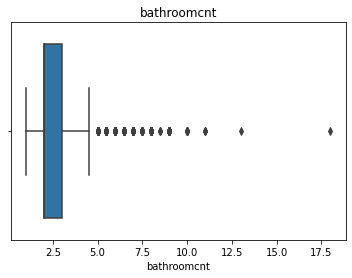

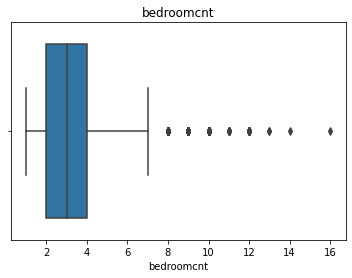

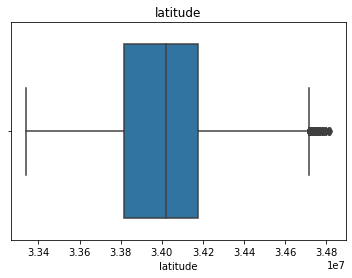

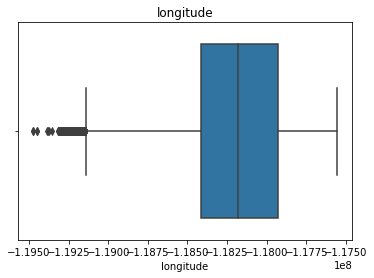

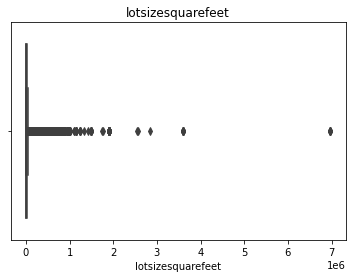

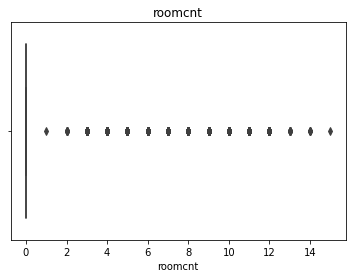

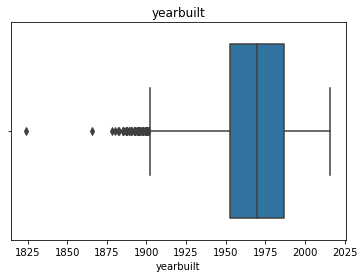

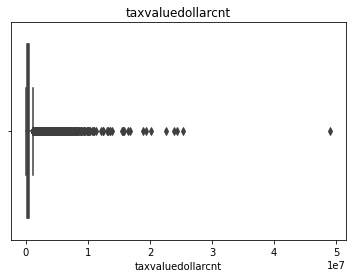

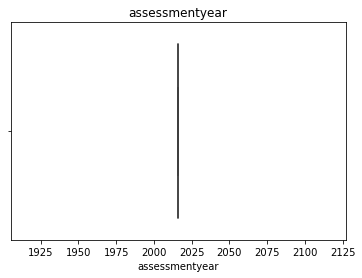

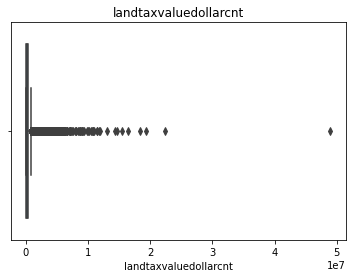

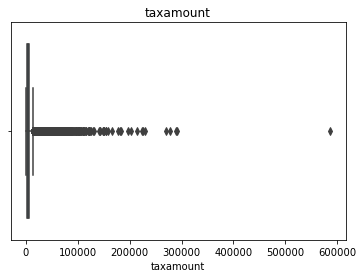

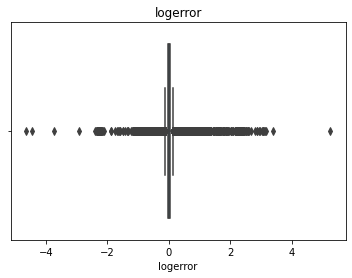

TypeError: Horizontal orientation requires numeric `x` variable.

In [19]:
# Use boxplots to identify outliers.
for col in b.columns:
    sns.boxplot(b[col])
    plt.title(col)
    plt.show()

In [ ]:
# Drop roomcnt column. I personally don't think this would affect the target, but I have not done any exploration.
b.drop(columns='roomcnt', inplace=True)

In [20]:
b.describe().T

count          mean            std           min  \
bathroomcnt            76720.0  2.319891e+00       0.978781  1.000000e+00   
bedroomcnt             76720.0  3.086614e+00       1.100956  1.000000e+00   
latitude               76720.0  3.400917e+07  265322.548323  3.333953e+07   
longitude              76720.0 -1.182032e+08  358445.447223 -1.194754e+08   
lotsizesquarefeet      76720.0  2.984149e+04  116504.438825  2.360000e+02   
roomcnt                76720.0  1.491097e+00       2.833887  0.000000e+00   
yearbuilt              76720.0  1.968684e+03      23.747054  1.824000e+03   
taxvaluedollarcnt      76720.0  4.886031e+05  647901.595803  1.000000e+03   
assessmentyear         76720.0  2.016000e+03       0.000000  2.016000e+03   
landtaxvaluedollarcnt  76720.0  3.001119e+05  490369.796973  1.610000e+02   
taxamount              76720.0  5.978039e+03    7554.847051  1.992000e+01   
logerror               76720.0  1.662140e-02       0.168753 -4.655420e+00   
LA                     76720.0  6.553311e-01       0.475263  0.000000e+00   
Orange                 76720.0  2.648592e-01       0.441261  0.000000e+00   
Ventura                76720.0  7.980970e-02       0.271000  0.000000e+00   

                                25%           50%           75%           max  
bathroomcnt            2.000000e+00  2.000000e+00  3.000000e+00  1.800000e+01  
bedroomcnt             2.000000e+00  3.000000e+00  4.000000e+00  1.600000e+01  
latitude               3.381573e+07  3.402252e+07  3.417481e+07  3.481877e+07  
longitude             -1.184154e+08 -1.181804e+08 -1.179290e+08 -1.175546e+08  
lotsizesquarefeet      5.947000e+03  7.561500e+03  2.153325e+04  6.971010e+06  
roomcnt                0.000000e+00  0.000000e+00  0.000000e+00  1.500000e+01  
yearbuilt              1.953000e+03  1.970000e+03  1.987000e+03  2.016000e+03  
taxvaluedollarcnt      2.070762e+05  3.589700e+05  5.685088e+05  4.906124e+07  
assessmentyear         2.016000e+03  2.016000e+03  2.016000e+03  2.016000e+03  
landtaxvaluedollarcnt  8.529200e+04  2.033550e+05  3.661598e+05  4.895220e+07  
taxamount              2.716807e+03  4.449705e+03  6.921142e+03  5.866393e+05  
logerror              -2.422330e-02  6.653406e-03  3.914374e-02  5.262999e+00  
LA                     0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
Orange                 0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
Ventura                0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00

In [21]:
# Create list of columns where outliers will be removed.
outliers = ['bedroomcnt','bathroomcnt','lotsizesquarefeet','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']

In [22]:
# Create a function to remove outliers.
def remove_outliers(df, col_list, k=1.5):
    
    for col in col_list:
        q1,q3 = df[col].quantile([.25, .75])
        iqr = q3 - q1
        upper_bound = q3 + (k * iqr)
        lower_bound = q1 - (k * iqr)
    
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]  
    return df

In [25]:
b = remove_outliers(b, outliers)

In [39]:
# Change dtype of transactiondate
b['transactiondate'] = pd.to_datetime(b['transactiondate'])

In [40]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61675 entries, 0 to 77573
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   bathroomcnt            61675 non-null  float64       
 1   bedroomcnt             61675 non-null  float64       
 2   latitude               61675 non-null  float64       
 3   longitude              61675 non-null  float64       
 4   lotsizesquarefeet      61675 non-null  float64       
 5   roomcnt                61675 non-null  float64       
 6   yearbuilt              61675 non-null  float64       
 7   taxvaluedollarcnt      61675 non-null  float64       
 8   assessmentyear         61675 non-null  float64       
 9   landtaxvaluedollarcnt  61675 non-null  float64       
 10  taxamount              61675 non-null  float64       
 11  logerror               61675 non-null  float64       
 12  transactiondate        61675 non-null  datetime64[ns]
 13  L

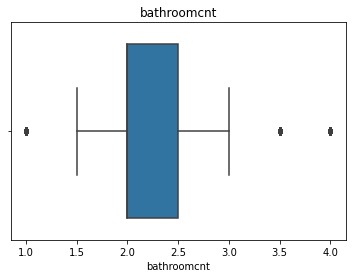

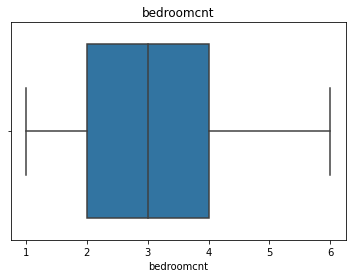

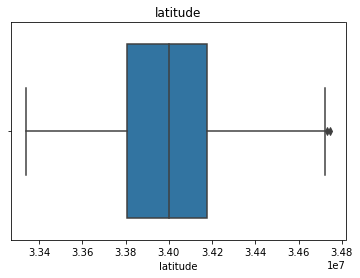

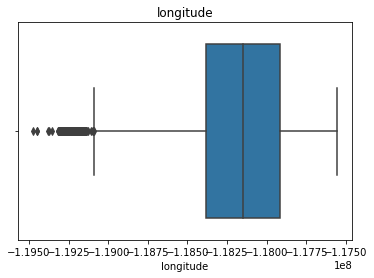

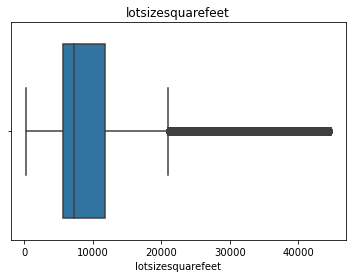

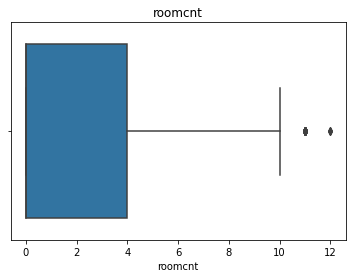

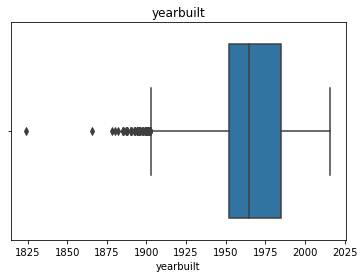

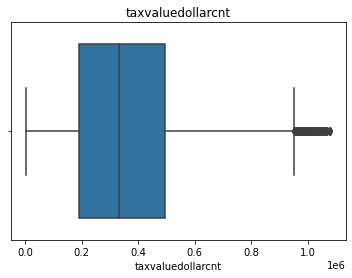

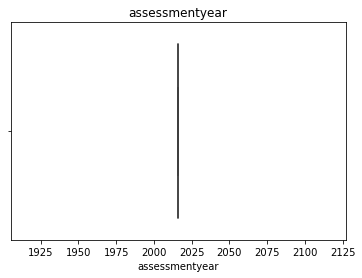

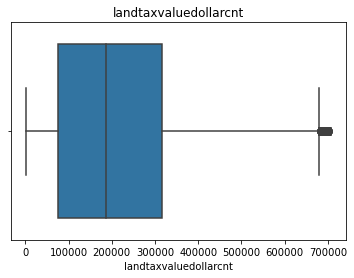

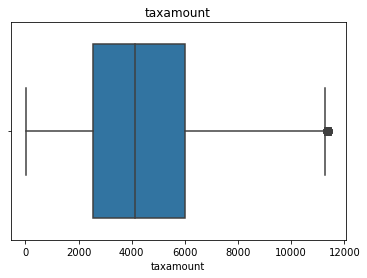

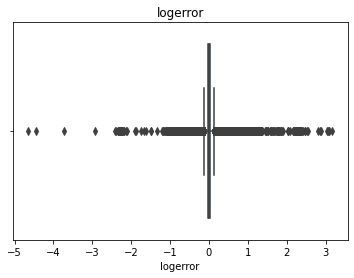

TypeError: Horizontal orientation requires numeric `x` variable.

In [27]:
# Use boxplots to identify outliers.
for col in b.columns:
    sns.boxplot(b[col])
    plt.title(col)
    plt.show()

In [38]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(b, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.shape)
print("validate observations: ", validate.shape)
print("test observations: ", test.shape)

train observations:  (34538, 16)
validate observations:  (14802, 16)
test observations:  (12335, 16)


## Time to explore!

Ask Questions

Target Variable: spending_score

Questions to answer &/or hypotheses to test:

What is the distribution of each of the variables? This is important as we move forward into testing and modeling.

Does the spending score differ across gender?

Is there a relationship between spending score and annual income? (Linear or otherwise).

Is there a relationship between age and spending score? (Linear or otherwise).

If we control for age (by decade), does spending score differ across annual income?

If we control for annual income, does spending score differ across age decades?

## Target Variable: logerror
#### What will all our features look like plotted against the target?
#### What is the distribution of each of the variables?
#### Does logerror differ significantly between counties?
#### Does logerror differ across longitude? latitude? 

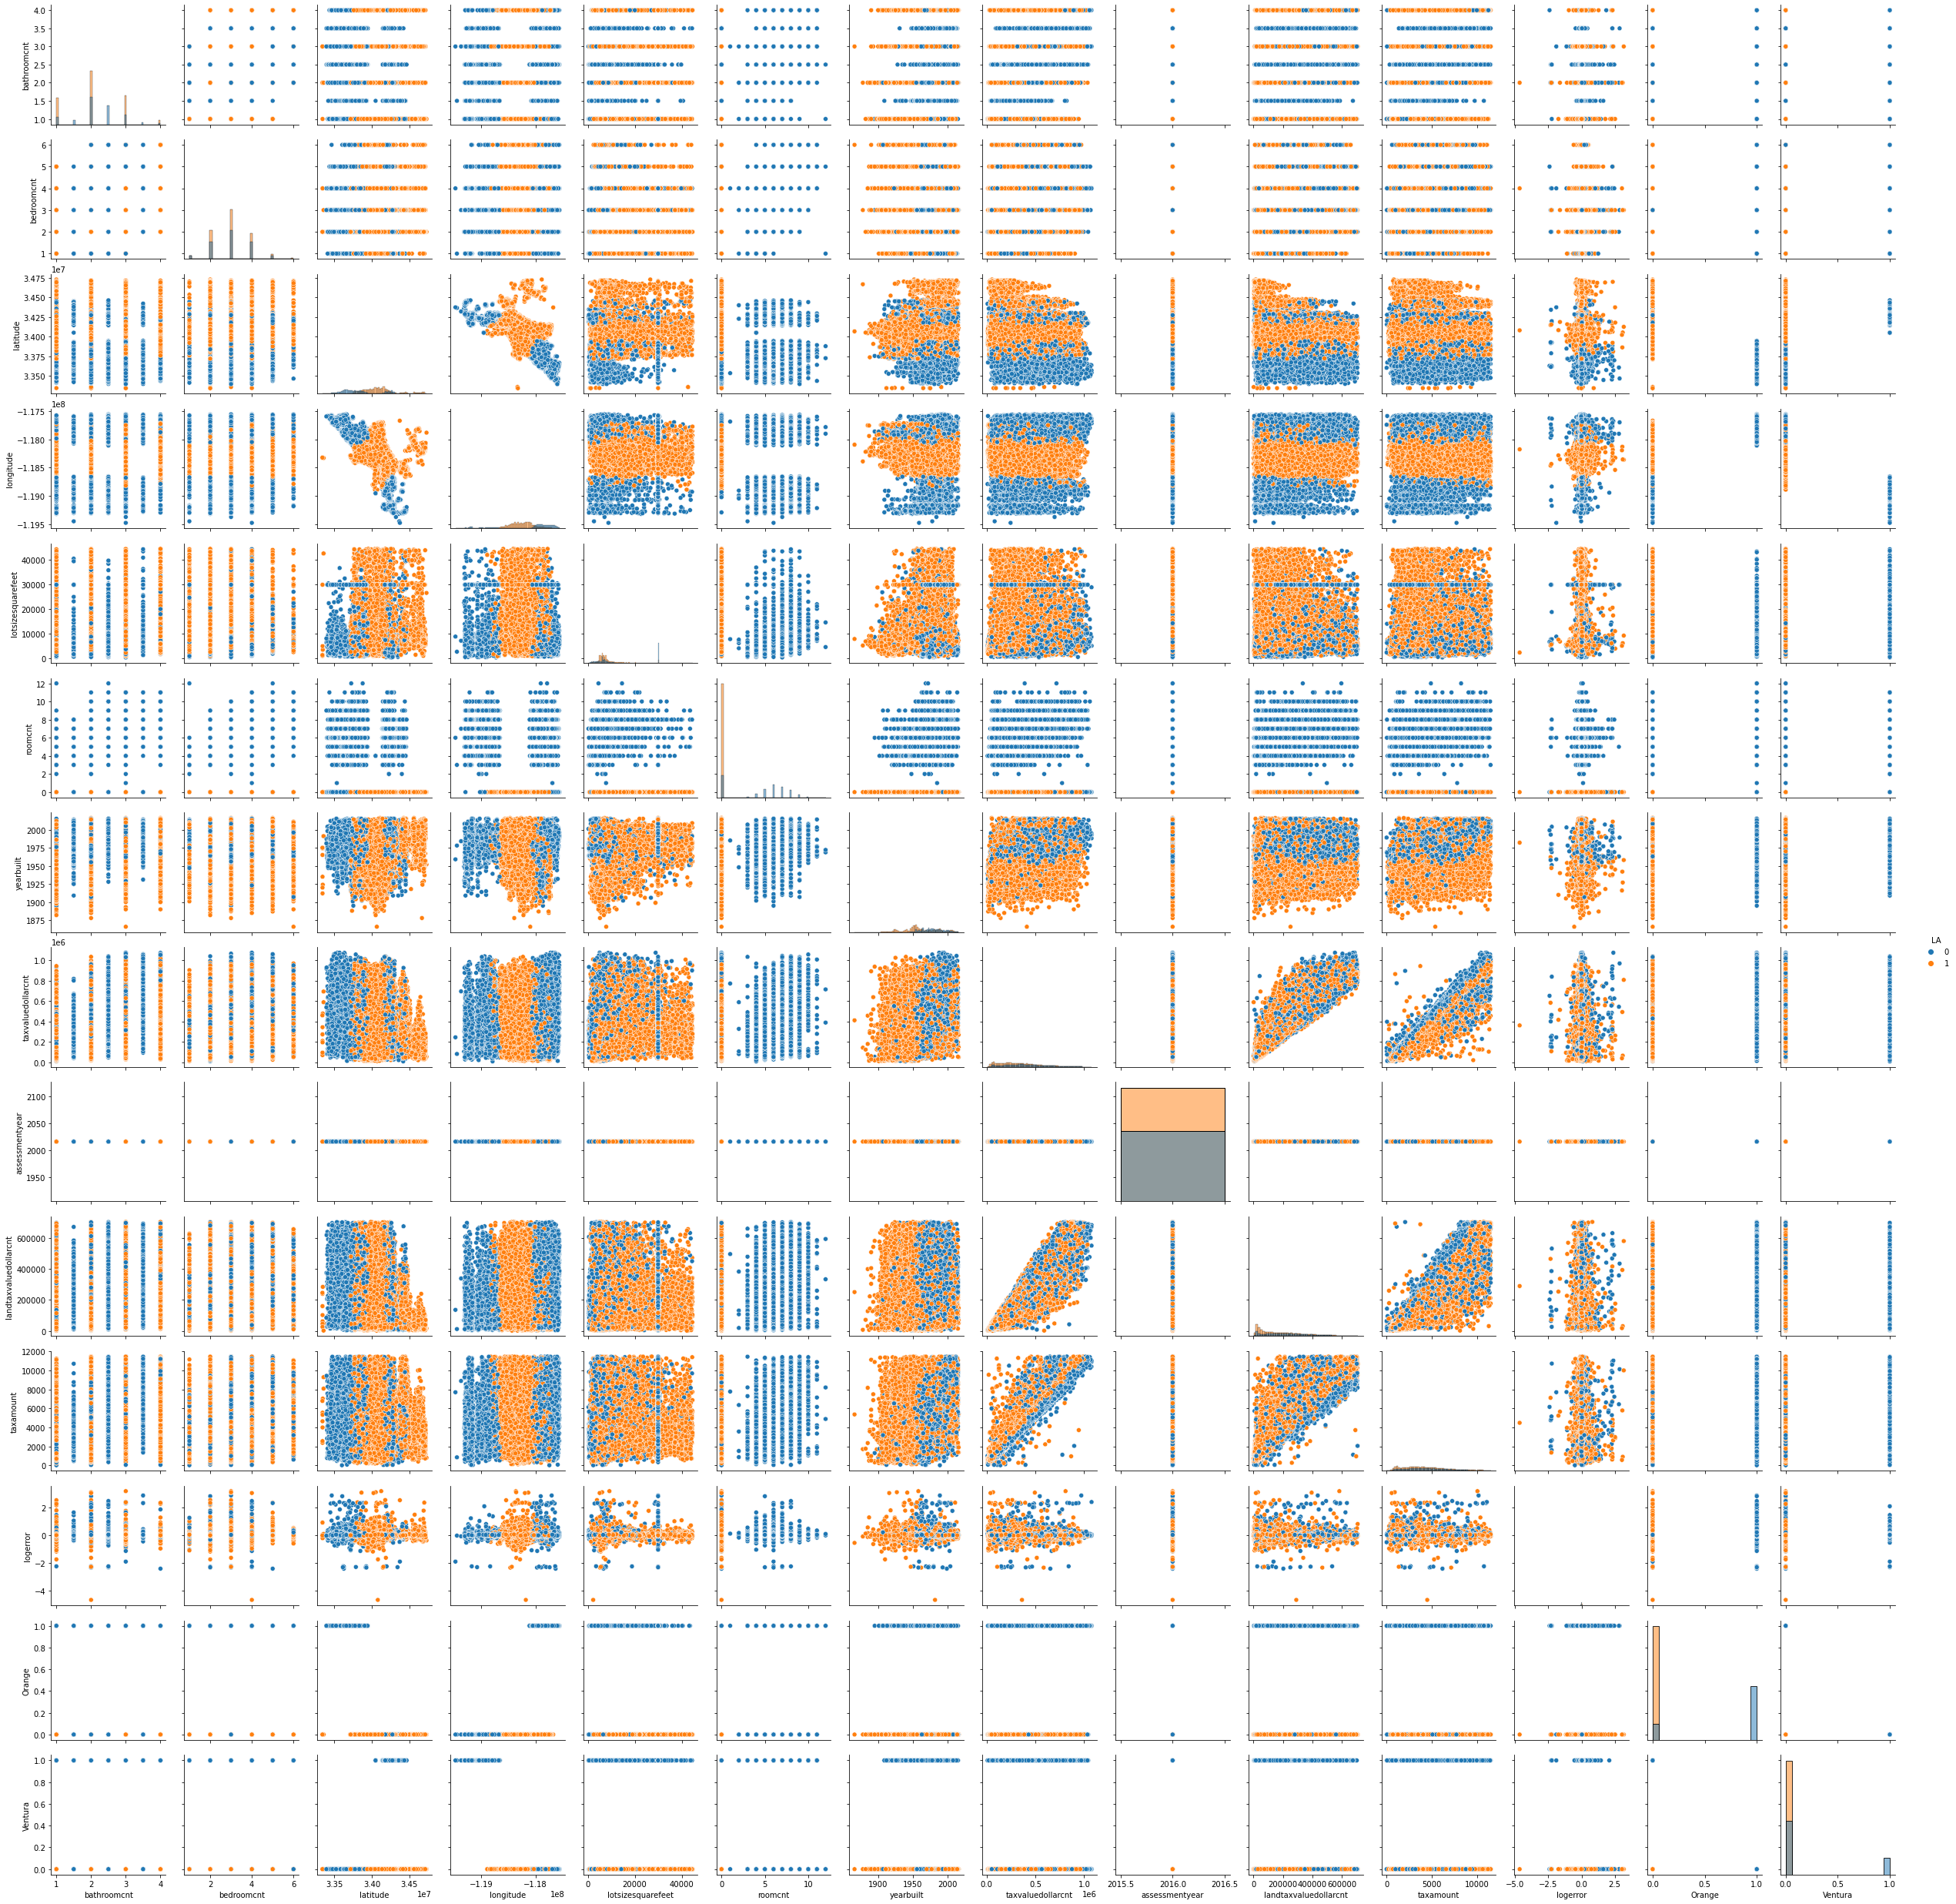

In [46]:
sns.pairplot(train, diag_kind="hist", hue = 'LA')